In [1]:
from matplotlib import pyplot as plt
import matplotlib
from sklearn import preprocessing
import os
import numpy as np
import random as rd
import tensorflow as tf 
tf.compat.v1.disable_eager_execution()
sess  = tf.compat.v1.InteractiveSession()
from scipy.integrate import odeint
import pickle
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter
import joblib

In [2]:
def model(x):
    a11, a12, a21, a22, gamma = np.array([0.9, 0, 0.7, 0.7, 0.4])
    x_f1 = a11*x[0] + a12*x[1]
    x_f2 = a21*x[0] + a22*x[1] + gamma*x[0]**2
    return [x_f1, x_f2]


In [3]:
# Number of time points we want for the solutions
n = 20

# Time points we want for the solution
t = np.linspace(0, 20, n)

# Parameters
beta_y = 5.0
beta_z = 5.0
gamma = 1.0
n_x = 2
n_y = 3
x_0 = 2.0
Km1 = 25000
Km2 = 500
delta = 0.18

# Package parameters into a tuple
args = (beta_y, beta_z, gamma, n_x, n_y, Km1, Km2, delta, x_0)

def toggle_switch(yz, t, beta_y, beta_z, gamma, n_x, n_y, Km1, Km2, delta, x):
    """
    Right hand side for cascade X -> Y -> Z.  Return dy/dt and dz/dt.
    """
    # Unpack y and z
    y, z = yz
    
    # Compute dy/dt
    dy_dt = beta_y/ (Km1 + z**n_x) - delta*y
    
    # Compute dz/dt
    dz_dt = gamma * (beta_z/ (Km2 + y**n_y) - delta*z)
    
    # Return the result as a NumPy array
    return np.array([dy_dt, dz_dt])

In [4]:
sess1 = tf.compat.v1.InteractiveSession()
saver = tf.compat.v1.train.import_meta_graph('Checkpoint_files/CFS_Koopman_correct_ics2.pickle.ckpt.meta', clear_devices=True)
saver.restore(sess1, tf.train.latest_checkpoint('Checkpoint_files'))

scaler_filename = 'Checkpoint_files/scaler.save'
scaler = joblib.load(scaler_filename) 

psixpT = tf.compat.v1.get_collection('psiyp')[0]
psixfT = tf.compat.v1.get_collection('psiyf')[0]
xpT_feed = tf.compat.v1.get_collection('yp_feed')[0]
xfT_feed = tf.compat.v1.get_collection('yf_feed')[0]
KxT = tf.compat.v1.get_collection('Kx')[0]
KxT_num = sess1.run(KxT)


/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


INFO:tensorflow:Restoring parameters from Checkpoint_files/Toggle_switch_DMJ_BFS.pickle.ckpt


NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key Variable_33 not found in checkpoint
	 [[node save/RestoreV2 (defined at /Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]]

Original stack trace for 'save/RestoreV2':
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/asyncio/base_events.py", line 534, in run_forever
    self._run_once()
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/asyncio/base_events.py", line 1771, in _run_once
    handle._run()
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 378, in dispatch_queue
    yield self.process_one()
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 714, in __init__
    self.run()
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-8ee120f8f981>", line 2, in <module>
    saver = tf.compat.v1.train.import_meta_graph('Checkpoint_files/CFS_Koopman_correct_ics2.pickle.ckpt.meta', clear_devices=True)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/training/saver.py", line 1453, in import_meta_graph
    **kwargs)[0]
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/training/saver.py", line 1477, in _import_meta_graph_with_return_elements
    **kwargs))
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/meta_graph.py", line 809, in import_scoped_meta_graph_with_return_elements
    return_elements=return_elements)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/importer.py", line 405, in import_graph_def
    producer_op_list=producer_op_list)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/importer.py", line 517, in _import_graph_def_internal
    _ProcessNewOps(graph)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/importer.py", line 243, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3564, in _add_new_tf_operations
    for c_op in c_api_util.new_tf_operations(self)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3564, in <listcomp>
    for c_op in c_api_util.new_tf_operations(self)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3454, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 1751, in __init__
    self._traceback = tf_stack.extract_stack()


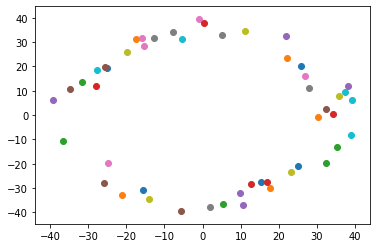

In [9]:
ICs = []
num_ics = 50
for i in range(0, num_ics):
    r = rd.uniform(30, 40)
    theta = rd.uniform(0, 4*1.57)
    ICs.append([r*np.cos(theta), r*np.sin(theta)])
    
for i in range(0, num_ics):
    plt.scatter(ICs[i][0],ICs[i][1])

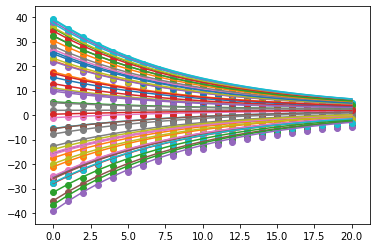

In [10]:
N = 20
Xp_final_learned = []
Xf_final_learned = []
Xp_final_actual = []
Xf_final_actual = []
t = np.array([i for i in range(0, N+1)])
x_learned = np.zeros(2)
x_actual = np.zeros(2)
for ic in ICs:
    ic_s = scaler.transform(np.array([ic]))
    x_learned = np.array(ic_s)
    x_actual[0] = ic[0]
    x_actual[1] = ic[1]
    X_learned = []
    X_actual = []
    X_learned.append([x_learned[0][0], x_learned[0][1]]) ## ICs
    X_actual.append(np.array([x_actual[0], x_actual[1]])) 
    for k in range(0, N):
        y_learned = np.matmul(KxT_num.T, psixpT.eval(feed_dict={xpT_feed: x_learned}).T)[0:2].T
        x_learned = y_learned
        X_learned.append([x_learned[0][0], x_learned[0][1]]) 
        #print(k)
        y_actual = model(x_actual)
        x_actual = y_actual
        X_actual.append([x_actual[0], x_actual[1]])
    Xp_learned = X_learned[0:-1]
    Xf_learned = X_learned[1:]
    Xp_actual = X_actual[0:-1]
    Xf_actual = X_actual[1:]   
    X_learned = scaler.inverse_transform(X_learned)
    plt.scatter(t, np.array(X_actual).T[0])
    plt.plot(t, np.array(X_learned).T[0])
    Xp_final_learned = Xp_final_learned + Xp_learned
    Xf_final_learned = Xf_final_learned + Xf_learned
    Xp_final_actual = Xp_final_actual + Xp_actual
    Xf_final_actual = Xf_final_actual + Xf_actual
    

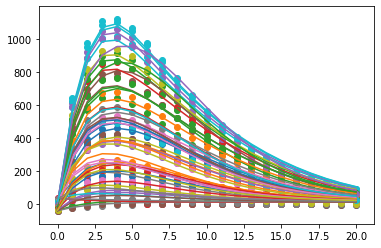

In [11]:
    
N = 20
Xp_final_learned = []
Xf_final_learned = []
Xp_final_actual = []
Xf_final_actual = []
t = np.array([i for i in range(0, N+1)])
x_learned = np.zeros(2)
x_actual = np.zeros(2)
for ic in ICs:
    ic_s = scaler.transform(np.array([ic]))
    x_learned = np.array(ic_s)
    x_actual[0] = ic[0]
    x_actual[1] = ic[1]
    X_learned = []
    X_actual = []
    X_learned.append([x_learned[0][0], x_learned[0][1]]) ## ICs
    X_actual.append(np.array([x_actual[0], x_actual[1]])) 
    for k in range(0, N):
        y_learned = np.matmul(KxT_num.T, psixpT.eval(feed_dict={xpT_feed: x_learned}).T)[0:2].T
        x_learned = y_learned
        X_learned.append([x_learned[0][0], x_learned[0][1]]) 
        #print(k)
        y_actual = model(x_actual)
        x_actual = y_actual
        X_actual.append([x_actual[0], x_actual[1]])
    Xp_learned = X_learned[0:-1]
    Xf_learned = X_learned[1:]
    Xp_actual = X_actual[0:-1]
    Xf_actual = X_actual[1:]   
    X_learned = scaler.inverse_transform(X_learned)
    plt.scatter(t, np.array(X_actual).T[1])
    plt.plot(t, np.array(X_learned).T[1])
    Xp_final_learned = Xp_final_learned + Xp_learned
    Xf_final_learned = Xf_final_learned + Xf_learned
    Xp_final_actual = Xp_final_actual + Xp_actual
    Xf_final_actual = Xf_final_actual + Xf_actual


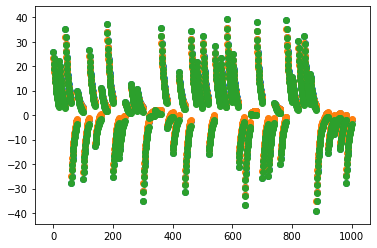

In [12]:
   
scale = 1
if scale:
    Xp_final_learned_scaled = scaler.inverse_transform(Xp_final_learned)
    Xf_final_learned_scaled = scaler.inverse_transform(Xf_final_learned)
else:
    Xp_final_learned_scaled = np.array(Xp_final_learned)
    Xf_final_learned_scaled = np.array(Xf_final_learned)

plt.scatter(np.linspace(0, len(Xp_final_learned_scaled[:, 0]), len(Xp_final_learned_scaled[:, 0])), Xp_final_learned_scaled[:, 0])
plt.scatter(np.linspace(0, len(Xf_final_learned_scaled[:, 0]), len(Xf_final_learned_scaled[:, 0])), Xf_final_learned_scaled[:, 0])

plt.scatter(np.linspace(0, len(np.array(Xp_final_actual)[:, 0]), len(np.array(Xp_final_actual)[:, 0])), np.array(Xp_final_actual)[:, 0])


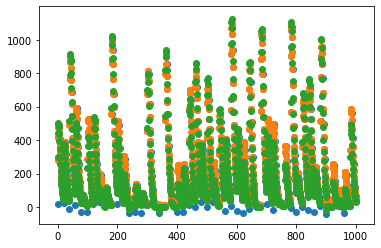

In [15]:
scale = 1
if scale:
    Xp_final_learned_scaled = scaler.inverse_transform(Xp_final_learned)
    Xf_final_learned_scaled = scaler.inverse_transform(Xf_final_learned)
else:
    Xp_final_learned_scaled = np.array(Xp_final_learned)
    Xf_final_learned_scaled = np.array(Xf_final_learned)


plt.scatter(np.linspace(0, len(Xp_final_learned_scaled[:, 1]), len(Xp_final_learned_scaled[:, 1])), Xp_final_learned_scaled[:, 1])
plt.scatter(np.linspace(0, len(Xf_final_learned_scaled[:, 1]), len(Xf_final_learned_scaled[:, 1])), Xf_final_learned_scaled[:, 1])

plt.scatter(np.linspace(0, len(np.array(Xf_final_actual)[:, 1]), len(np.array(Xf_final_actual)[:, 1])), np.array(Xf_final_actual)[:, 1])


In [ ]:
sess1.close()